In [ ]:
pip install sentence-transformers

In [ ]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('sentence-transformers/LaBSE')

In [ ]:
import pandas as pd
gold_set = pd.read_csv('/content/paraphrases_gold.csv')
gold_set

In [ ]:
df_1 = gold_set[gold_set['value/5/#text'] == 1]
df_1

In [ ]:
sentences1 = df_1['value/3/#text'].tolist()
embeddings1 = model.encode(sentences1)

In [ ]:
sentences2 = df_1['value/4/#text'].tolist()
embeddings2 = model.encode(sentences2)

In [ ]:
import torch
cos = torch.nn.CosineSimilarity(dim=1)
one = cos(torch.from_numpy(embeddings1), torch.from_numpy(embeddings2))
one

In [ ]:
import numpy as np
np.mean(np.array(one))

0.8908037

In [ ]:
np.std(np.array(one))

0.077982455

In [ ]:
df_2 = gold_set[gold_set['value/5/#text'] == 0]
df_2

In [ ]:
sentences1 = df_2['value/3/#text'].tolist()
embeddings1 = model.encode(sentences1)

In [ ]:
sentences2 = df_2['value/4/#text'].tolist()
embeddings2 = model.encode(sentences2)

In [ ]:
import torch
cos = torch.nn.CosineSimilarity(dim=1)
zero = cos(torch.from_numpy(embeddings1), torch.from_numpy(embeddings2))
zero

In [ ]:
np.mean(np.array(zero))

0.8083653

In [ ]:
np.std(np.array(zero))

0.09969515

In [ ]:
df_3 = gold_set[gold_set['value/5/#text'] == -1]
df_3

In [ ]:
sentences1 = df_3['value/3/#text'].tolist()
embeddings1 = model.encode(sentences1)

In [ ]:
sentences2 = df_3['value/4/#text'].tolist()
embeddings2 = model.encode(sentences2)

In [ ]:
import torch
cos = torch.nn.CosineSimilarity(dim=1)
one_minus = cos(torch.from_numpy(embeddings1), torch.from_numpy(embeddings2))
one_minus

In [ ]:
np.mean(np.array(one_minus))

0.6582371

In [ ]:
np.std(np.array(one_minus))

0.1494934

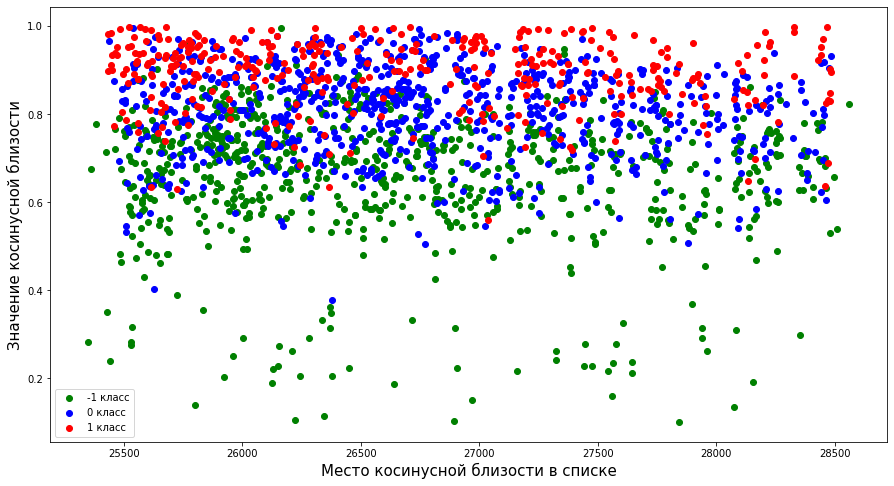

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 8))

x1 = df_1['value/0/#text'].tolist()
y1 = one

x2 = df_2['value/0/#text'].tolist()
y2 = zero

x3 = df_3['value/0/#text'].tolist()
y3 = one_minus

ax.scatter(x3, y3, color = 'green', label = '-1 класс')
ax.scatter(x2, y2, color = 'blue', label = '0 класс')
ax.scatter(x1, y1, color = 'red', label = '1 класс')

ax.legend()

plt.xlabel("Место косинусной близости в списке", fontsize = 15)
plt.ylabel("Значение косинусной близости", fontsize = 15)

plt.show()